## Задача 9.1

In [410]:
%matplotlib inline  
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import csv

Считаем данные и оценим для проверки параметр $\theta$.

In [411]:
data = np.load('9-1.npy')
#temp = st.expon.rvs(loc=0, scale=1/(1.0), size=len(data), random_state=None)
print("Оценка тета:" + str(1/np.mean(data)))
#print(1/np.mean(temp))

Оценка тета:0.8813907606470099


В теоретических задачах были получены два равноменрно наиболее мощных критерия $S$ уровня значения $\alpha$ проверки гипотезы
- $H_0$: $\theta = \theta_0$ vs $H1$: $\theta > \theta_0$
- $H_0$: $\theta = \theta_0$ vs $H1$: $\theta < \theta_0$

Для первого $S = \{ \sum{X_i} < z_{\alpha} \} $ 

Для второго $S = \{ \sum{X_i} > z_{1 -\alpha} \}$

Где $z_{\alpha}$ и $z_{1-\alpha}$ квантили гамма распределения $Г(n,\theta_0)$

In [412]:
tetas = np.array([0.9,1,1.1])

Создадим критерий для каждого предполагаемого значения $\theta ={0.9,1.0,1.1}$ для различных уровней значимости.

In [413]:
set1 = sum(data)
set2 = sum(temp)
n = len(data)
c_results = []
b_results = []
a_results = []
c_results1 = []
b_results1 = []
a_results1 = []
level = np.zeros(3)
level1 = np.zeros(3)
x = np.linspace(0,0.5,1000)
for i in range(0, 1000):
    for j in range(3):
        level[j] = st.gamma.ppf(1-x[i], n, loc=0, scale=1/tetas[j])
        level1[j] = st.gamma.ppf(x[i], n, loc=0, scale=1/tetas[j])
    a_results.append(level[0])  
    b_results.append(level[1])
    c_results.append(level[2])
    a_results1.append(level1[0])  
    b_results1.append(level1[1])
    c_results1.append(level1[2])

Подберем такой уровень значимости, чтобы оба критерия выполниль одновременно соответсвенно для $\theta = {0.9,1.0,1.1}$. То есть график суммы $\sum{X_i}$ лежал между квантилей $ \left(  z_{1 - \alpha}, \   z_{\alpha} \right)$. 

То есть одновременно выполнялось: $\{ \sum{X_i} > z_{1 -\alpha} \} \cap \{ \sum{X_i} < z_{\alpha} \}$

Причем уровень значимости должен быть таков, чтобы мы отвергли два критерия для $\theta_1$ и $\theta_2$, но приняли только для одного $\theta_0$

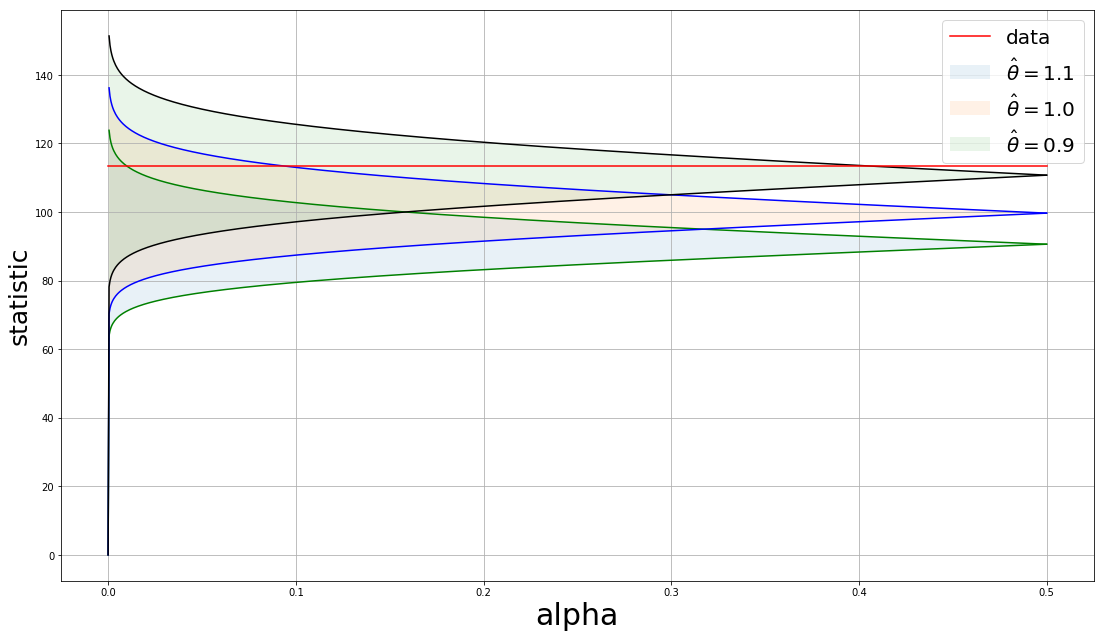

In [414]:
plt.fill_between(x, c_results, c_results1,alpha=0.1,
                label = r'$\hat{\theta} = 1.1$')
plt.fill_between(x, b_results, b_results1,alpha=0.1,
                label = r'$\hat{\theta} = 1.0$')
plt.fill_between(x, a_results, a_results1,alpha=0.1,
                label = r'$\hat{\theta} = 0.9$')
plt.plot(x, c_results, color='green')
plt.plot(x, b_results, color ='blue')
plt.plot(x, a_results, color='black')
plt.plot(x, c_results1, color='green')
plt.plot(x, b_results1, color='blue')
plt.plot(x, a_results1, color='black')
plt.plot(x, set1*np.ones(1000), label = 'data', color='red')
#plt.plot(x, set2*np.ones(1000), label = 'temp')
plt.xlabel('alpha', fontsize=30)
plt.ylabel("statistic", fontsize=25)
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)
plt.legend( fontsize=20)
plt.show()

### Вывод

Таким образом видно, что истинное значение $\theta$ равно $0.9$ с уравнем значимости $\alpha = 0.3$. Уровень значимости статистического критерия – это ограничение сверху на вероятность ошибки первого рода (вероятность отвергнуть нулевую гипотезу, когда она на самом деле верна).

То есть при уровне значимости $\alpha = 0.3$ мы отвергли гипотезы, что $\theta = 1.1$ и $\theta = 1.0$, тогда оставшуюся гипотезу $\theta = 0.9$ считаем верной.

Действительно если сравнить с оценкой парамета $\hat{\theta} = 0.88 $ можно считать, что выборка из распредения $Expon(0.9)$